### Treść zadania

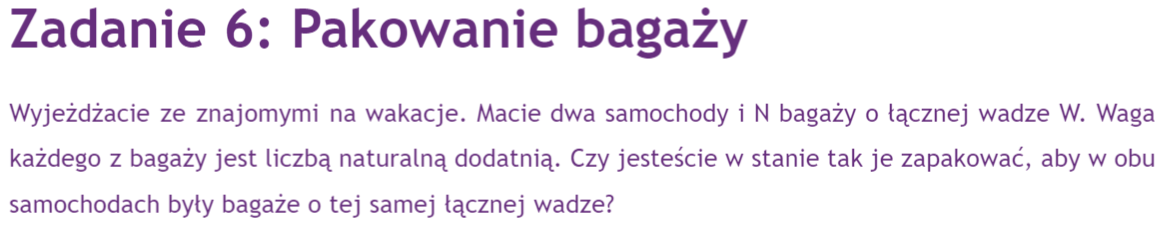

### Omówienie algorytmu

Bardzo proste zadanie. Wystarczy sobie tylko przypomnieć algorytm na sumę podzbioru (który bazuje na algorytmie plecakowym - patrz <a href="../../../Ćwiczenia/5. Ćwiczenia/Zadania/Zadanie 2. (czy istnieje podciąg ciągu liczb naturalnych, który sumuje się do T).ipynb">TUTAJ</a>). Teraz trzeba zdać sobie sprawę, co tak naprawdę chcemy osiągnąć. Naszym celem jest załadowanie obu bagażników WSZYSTKIMI bagażami w taki sposób, że w obu masa wszystkich bagaży jest TAKA SAMA. Zauważmy, że skoro masa ma być taka sama, a łączna masa bagaży wynosi $ W $ (jeżeli $ W $ nie jest dane, to łatwo je wyliczymy jako sumaryczną masę wszystkich bagaży), w obu bagażnikach muszą się znaleźć takie bagaże, których masa sumuje się dokładnie do $ \frac{W}{2} $ (w każdym z osobna). Ponieważ również wiemy, że masy bagaży wyrażają się liczbami naturalnymi dodatnimi (na szczęście), w sytuacji, w której otrzymany wynik $ \frac{W}{2} $ będzie liczbą zmiennoprzecinkową, od razu możemy zwrócić fałsz, bo przedmiotów nie podzielimy na pół, czy na jakieś części, musimy brać całe, ale się nie da. Natomiast, gdy $ \frac{W}{2} $ jest liczbą naturalną, zaczyna się tak naprawdę nasz algorytm. Cała filozofia polega na tym, aby zastosować podlinkowany wcześniej algorytm i sprawdzić, czy spośród wszystkich przedmiotów da się wybrać taki podzbiór, że łączna masa przedmiotów w tym podzbiorze wynosi dokładnie $ \frac{W}{2} $. Zauważmy, że rozważamy tylko jeden podzbiór, nie obchodzi nas, że mamy 2 bagażniki, ponieważ, skoro łączna masa przedmiotów to $ W $ i uda nam się do jednego z bagażnikow wrzucić przedmioty o łącznej masie $ \frac{W}{2} $, to wszystkie pozostałe przedmioty muszą mieć łączną masę równą $ W - \frac{W}{2} = \frac{W}{2} $.

### Złożoność

###### Obliczeniowa:
$ O(\frac{W}{2} \cdot n) = O(W \cdot n) $, gdzie $ n $ - liczba przedmiotów, $ W $ - sumaryczna masa przedmiotów,
###### Pamięciowa:
$ O(\frac{W}{2}) = O(W) $

### Implementacja

In [1]:
def can_pack(A: 'array of luggage weights'):
    W = sum(A)
    # Max weight of the one car trunk
    max_W = W // 2
    if max_W != W / 2: return False
    
    # Check if all items are lighter than W/2
    n = len(A)
    for i in range(n):
        if A[i] > max_W: return False
        
    # Create the initial row of values
    F = [False] * (max_W + 1)
    F[0] = F[A[0]] = True
        
    # Loop over the remaining values and check if the subsequence sums up to max_W
    for i in range(1, n):
        # Go from right in order not to overwrite values which will be processed
        # later
        for j in range(max_W, 0, -1):
            if not F[j] and A[i] <= j:
                F[j] = F[j - A[i]]
            # Check if we have already found matching items
            if F[max_W]: return True
            
    return False

###### Kilka testów

In [2]:
from random import randint

A = [randint(1, 15) for _ in range(randint(5, 20))]
print(A)
print(can_pack(A))

[1, 12, 1, 1, 9, 8, 7, 10, 13, 10, 15, 2, 9, 12, 14]
True


### (Dodatkowo) Zwracanie rozwiązania
##### (Tego, które przedmioty bierzemy)

Otrzymywanie rozwiązania znajduje się <a href="../../../Wykłady/5. Wykład/Zadania obowiązkowe/Zadanie 2. (czy istnieje podciąg ciągu liczb naturalnych, który sumuje się do T).ipynb">TUTAJ</a> (to samo zadanie, co podlinkowane wyżej (chodzi o <a href="../../../Ćwiczenia/5. Ćwiczenia/Zadania/Zadanie 2. (czy istnieje podciąg ciągu liczb naturalnych, który sumuje się do T).ipynb">TO</a>), ale nieco gorsze rozwiązanie). Niemniej jednak, pokazane zostały sposoby na otrzymywanie rozwiązania, z czego skorzystamy niżej.

### Złożoność
##### (Złożoność pamięciowa będzie gorsza niż wyżej, ponieważ musimy pamiętać każdy wybór w tablicy)

###### Obliczeniowa:
$ O(\frac{W}{2} \cdot n) = O(W \cdot n) $, gdzie $ n $ - liczba przedmiotów, $ W $ - sumaryczna masa przedmiotów,
###### Pamięciowa:
$ O(\frac{W}{2} \cdot n) = O(W \cdot n) $

In [3]:
def pack_first_trunk(A: 'array of luggage weights'):
    W = sum(A)
    # Max weight of the one car trunk
    max_W = W // 2
    if max_W != W / 2: return None
    
    # Check if all items are lighter than W/2
    n = len(A)
    for i in range(n):
        if A[i] > max_W: return None
        
    # Create the initial row of values
    F = [[False] * (max_W + 1) for _ in range(n)]
    F[0][A[0]] = True
    
    # Set the first column to True (we will always be able to
    # create a subset of sum equal to 0 (e g. an ampry subset)
    for i in range(n): F[i][0] = True
    
    # Set the first value possible to obtain to True
    F[0][i] = A[0] == i
        
    # Loop over the remaining values and check if the subsequence sums up to T
    for i in range(1, n):
        # Go from right in order not to overwrite values which will be processed
        # later
        for j in range(1, max_W + 1):
            F[i][j] = F[i - 1][j]
            if not F[i][j] and A[i] <= j:
                F[i][j] = F[i - 1][j - A[i]]
            # Check if we have already found matching items
            if F[i][max_W]: return get_res(F, A, i)
            
    return None


def get_res(F, A, i):
    contents = []
    w = len(F[0]) - 1
    for i in range(i, 0, -1):
        # If we have taken an item from the 'i'th row, a value stored
        # in this row will be different than a value in a row above
        if F[i][w] != F[i - 1][w]:
            contents.append(i)
            w -= A[i]
    # As we will never check the first row in a loop above, we have
    # to asses whether the item from the first row was taken separately
    # We decide to take the first element only if there is still some value
    # remaining
    if w > 0: contents.append(0)
    
    # Reverse the result array as we get indices in a reversed order
    for i in range(len(contents) // 2):
        swap(contents, i, -i-1)
    
    return contents


def swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]

###### Kilka testów

In [4]:
from random import randint

A = [randint(1, 15) for _ in range(randint(5, 20))]

print(A)
res = pack_first_trunk(A)
print('Cannot fill the trunk' if res is None else f'Contents (indices): {res}\nContents (weights): {[A[i] for i in res]}')
if res:
    print('Sum of all weights:', sum(A))
    print('Sum of the first part weights:', sum(A[i] for i in res))

[14, 13, 10, 6, 10, 1, 8, 6]
Contents (indices): [0, 2, 4]
Contents (weights): [14, 10, 10]
Sum of all weights: 68
Sum of the first part weights: 34
